In [18]:
import torch
from torch import nn
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
from PIL import Image
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
import os

In [2]:
IMAGE_PATH = "images"
CLASSES = ('blue', 'green', 'red')
IMAGE_SIZE = 28

In [3]:
from torchvision import datasets

In [4]:
data_transform = transforms.Compose([
    transforms.Resize(size = (IMAGE_SIZE, IMAGE_SIZE)),
    transforms.ToTensor()
])

In [5]:
train_data = datasets.ImageFolder(root = IMAGE_PATH + "/train/",
                                  transform = data_transform,
                                  target_transform = None)

test_data = datasets.ImageFolder(root = IMAGE_PATH + "/test/",
                                 transform = data_transform,
                                 target_transform = None)

0


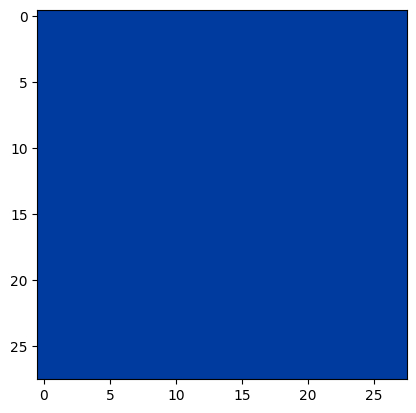

In [6]:
img, label = train_data[0][0], train_data[0][1]
plt.imshow(img.permute(1,2,0))
print(label)

In [7]:
train_data.class_to_idx

{'blue': 0, 'green': 1, 'red': 2}

In [8]:
train_dataloader = DataLoader(dataset = train_data,
                              batch_size = 32,
                              shuffle = True)

test_dataloader = DataLoader(dataset = test_data,
                              batch_size = 32,
                              shuffle = True)

In [9]:
for batch, (x, y) in enumerate(train_dataloader):
    print(f"batch: {batch} | y: {y}")

batch: 0 | y: tensor([0, 0, 1, 1, 0, 2, 2, 1, 2, 2, 0, 2, 0, 0, 2, 1, 1, 1, 0, 2, 1, 0, 2, 0,
        1, 0, 0, 1, 0, 1, 0, 2])
batch: 1 | y: tensor([1, 1, 0, 1, 0, 1, 2, 1, 1, 2, 1, 2, 0, 2, 0, 2, 0, 1, 2, 0, 2, 2, 1, 2,
        2, 0, 1, 0, 0, 2, 2, 0])
batch: 2 | y: tensor([0, 0, 0, 0, 2, 2, 0, 0, 0, 0, 1, 1, 2, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0,
        1, 2, 0, 0, 1, 1, 1, 1])
batch: 3 | y: tensor([0, 0, 0, 1, 0, 0, 1, 2, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 2, 0, 2, 2, 1, 0,
        0, 1, 2, 2, 1, 0, 0, 0])
batch: 4 | y: tensor([0, 1, 2, 2, 1, 0, 1, 1, 2, 1, 2, 2, 1, 2, 2, 0, 2, 1, 0, 0, 2, 0, 1, 2,
        0, 0, 1, 0, 2, 0, 2, 2])
batch: 5 | y: tensor([0, 2, 0, 2, 0, 2, 2, 2, 1, 2, 1, 2, 1, 2, 0, 1, 1, 2, 0, 0, 1, 1, 0, 0,
        1, 0, 2, 2, 0, 1, 0, 2])
batch: 6 | y: tensor([1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 2, 0, 1, 0, 0, 1, 0, 0, 0, 2, 2, 2, 1, 2,
        2, 0, 0, 0, 1, 2, 1, 0])
batch: 7 | y: tensor([0, 2, 2, 1, 2, 0, 1, 0, 2, 1, 2, 2, 2, 0, 0, 1, 0, 1, 1, 1, 0, 2, 2, 2,
        1, 2, 1, 

In [10]:
class ColorClass(nn.Module):
    def __init__(self, input_shape, out_shape, hidden_features):
        super().__init__()
        self.conv_block_1 = nn.Sequential(
            nn.Conv2d(in_channels = input_shape,
                      out_channels = hidden_features, 
                      kernel_size = 3,
                      stride = 1,
                      padding = 1),
            nn.ReLU(),
            
            nn.Conv2d(in_channels = hidden_features,
                      out_channels = hidden_features, 
                      kernel_size = 3,
                      stride = 1,
                      padding = 1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size = 3)
        )
        self.classifier = nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features = hidden_features * 81,
                      out_features = out_shape)
        )
        
    
    def forward(self, x):
        x = self.conv_block_1(x)
        x = self.classifier(x)
        return x

In [11]:
model = ColorClass(input_shape = 3, out_shape = 3, hidden_features = 8)
model.state_dict()

OrderedDict([('conv_block_1.0.weight',
              tensor([[[[-8.0681e-02, -5.2261e-02, -9.8300e-02],
                        [-1.0849e-01,  2.3547e-02,  7.0683e-02],
                        [-8.4582e-02,  1.3444e-01, -1.2570e-01]],
              
                       [[-1.8960e-01,  1.1060e-02,  1.4556e-01],
                        [-1.1375e-01, -1.5100e-01,  4.2805e-02],
                        [ 3.7521e-02,  7.8598e-02,  1.6076e-01]],
              
                       [[-1.9774e-02,  1.1862e-01,  1.5891e-01],
                        [ 1.7446e-01,  1.8413e-03, -1.3045e-01],
                        [ 5.7975e-02,  8.1782e-02,  1.3698e-01]]],
              
              
                      [[[-1.6975e-01,  1.2850e-01, -1.4898e-01],
                        [ 1.1518e-01,  8.1689e-02,  7.7929e-02],
                        [ 1.1117e-02, -3.2946e-02, -1.1416e-01]],
              
                       [[-6.2394e-02,  1.9230e-01, -1.2052e-01],
                        [-1.3255e-02

In [12]:
for batch, (x, y) in enumerate(train_dataloader):
    print(f"{model(x).argmax(dim=1)} | {y}")

tensor([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1]) | tensor([2, 0, 0, 0, 2, 2, 2, 2, 1, 2, 0, 2, 2, 2, 2, 1, 2, 2, 2, 1, 1, 1, 0, 1,
        2, 2, 0, 1, 2, 2, 0, 2])
tensor([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1]) | tensor([0, 1, 2, 0, 2, 2, 2, 2, 0, 1, 2, 1, 1, 0, 1, 1, 2, 2, 0, 2, 0, 0, 2, 1,
        1, 0, 1, 0, 2, 1, 0, 1])
tensor([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1]) | tensor([1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 2, 0, 0, 2, 1, 1, 0, 0, 2, 0, 0,
        0, 1, 0, 2, 2, 1, 0, 0])
tensor([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1]) | tensor([2, 2, 1, 2, 0, 1, 2, 0, 1, 2, 2, 2, 2, 1, 1, 2, 1, 2, 1, 0, 0, 1, 1, 1,
        1, 0, 1, 0, 1, 1, 2, 2])
tensor([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        

In [13]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=1e-2) #adam or SGD

In [14]:
def accuracy_fn(y_true, y_pred):
    correct = torch.eq(y_true, y_pred).sum().item()
    acc = (correct/len(y_pred))*100
    return acc

In [15]:
epochs = 100

for epoch in range(epochs):
    train_loss = 0
    for batch, (x, y) in enumerate(train_dataloader):
        model.train()
        y_pred = model(x)
            
        loss = loss_fn(y_pred, y)
        train_loss += loss
        
        optimizer.zero_grad()
        
        loss.backward()
        
        optimizer.step()
        
    print(f"epoch: {epoch}/{epochs}")
    
    train_loss /= len(train_dataloader)
    test_loss = 0
    acc = 0
    
    model.eval()
    with torch.inference_mode():
        for batch, (x, y) in enumerate(test_dataloader):
            y_pred = model(x)
            
            test_loss += loss_fn(y_pred, y)
            acc += accuracy_fn(y, y_pred.argmax(dim=1))
            
        test_loss /= len(test_dataloader)
        acc /= len(test_dataloader)
    
    if epoch % 10 == 0:
        print(f"epoch: {epoch} | acc: {acc} | loss: {train_loss:.5f} | loss_test: {test_loss:.5f}")
        

epoch: 0/100
epoch: 0 | acc: 100.0 | loss: 0.18692 | loss_test: 0.02026
epoch: 1/100
epoch: 2/100
epoch: 3/100
epoch: 4/100
epoch: 5/100
epoch: 6/100
epoch: 7/100
epoch: 8/100
epoch: 9/100
epoch: 10/100
epoch: 10 | acc: 100.0 | loss: 0.00010 | loss_test: 0.00014
epoch: 11/100
epoch: 12/100
epoch: 13/100
epoch: 14/100
epoch: 15/100
epoch: 16/100
epoch: 17/100
epoch: 18/100
epoch: 19/100
epoch: 20/100
epoch: 20 | acc: 100.0 | loss: 0.00002 | loss_test: 0.00002
epoch: 21/100
epoch: 22/100
epoch: 23/100
epoch: 24/100
epoch: 25/100
epoch: 26/100
epoch: 27/100
epoch: 28/100
epoch: 29/100
epoch: 30/100
epoch: 30 | acc: 100.0 | loss: 0.00000 | loss_test: 0.00001
epoch: 31/100
epoch: 32/100
epoch: 33/100
epoch: 34/100
epoch: 35/100
epoch: 36/100
epoch: 37/100
epoch: 38/100
epoch: 39/100
epoch: 40/100
epoch: 40 | acc: 100.0 | loss: 0.00000 | loss_test: 0.00000
epoch: 41/100
epoch: 42/100
epoch: 43/100
epoch: 44/100
epoch: 45/100
epoch: 46/100
epoch: 47/100
epoch: 48/100
epoch: 49/100
epoch: 50/1

In [16]:
from pathlib import Path

MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents = True,
                 exist_ok = True)
MODEL_NAME = "ColorFinder.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME
torch.save(obj = model.state_dict(),
           f = MODEL_SAVE_PATH)